In [1]:
import pandas as pd

In [2]:
profile_df = pd.read_excel('profiles.xlsx')
profile_df

,Unnamed: 0,name,uob_url,uwe_url
0,0,Arthur Richards,https://research-information.bris.ac.uk/en/per...,NaN
1,1,Manuel Giuliani,NaN,https://uwe-repository.worktribe.com/person/43...
2,2,Jonathan Rossiter,https://research-information.bris.ac.uk/en/per...,NaN
3,3,Paul Bremner,NaN,https://uwe-repository.worktribe.com/person/79...
4,4,Chris Melhuish,NaN,https://uwe-repository.worktribe.com/person/79...
5,5,Sabine Hauert,https://research-information.bris.ac.uk/en/per...,NaN
6,6,Nathan Lepora,https://research-information.bris.ac.uk/en/per...,NaN
7,7,Mark Hansen,NaN,https://uwe-repository.worktribe.com/person/79...
8,8,Antonia Tzemanaki,https://research-information.bris.ac.uk/en/per...,NaN
9,9,Tony Pipe,NaN,https://uwe-repository.worktribe.com/person/43...


## Merge all the UoB results into one big database

In [3]:
def merge_author_list_func(this_row):
    alist = []
    if type(this_row.uob_author_list_x)==list:
        alist = this_row.uob_author_list_x
    if type(this_row.uob_author_list_y)==list:
        alist = alist + this_row.uob_author_list_y
    return alist

def merge_source_list_func(this_row):
    alist = []
    if type(this_row.uob_source_url_list_x)==list:
        alist = this_row.uob_source_url_list_x
    if type(this_row.uob_source_url_list_y)==list:
        alist = alist + this_row.uob_source_url_list_y
    return alist

In [4]:
merge_columns = ['uob_detail_url','title','uob_date_str','date']
uob_df = pd.DataFrame(columns=['uob_detail_url','title','uob_date_str','date'])
for ii in range(len(profile_df)):
    this_name = profile_df.at[ii,'name'] 
    this_url = profile_df.at[ii,'uob_url']
    if type(this_url)==str:
        this_file = 'results/' + this_name.replace(' ','_') + '_uob.xlsx'
        print(this_file)
        this_df = pd.read_excel(this_file)
        this_df['uob_author_list'] = [[a] for a in this_df.uob_author]
        this_df['uob_source_url_list'] = [[a] for a in this_df.source_url]
        uob_df = pd.merge(uob_df,this_df, on=merge_columns,how='outer')
        if 'uob_author_list_x' in uob_df.columns:
            # found some overlapping entries            
            uob_df['uob_author_list'] = uob_df.apply(merge_author_list_func,axis=1)
            uob_df['uob_source_url_list'] = uob_df.apply(merge_source_list_func,axis=1)
        uob_df.drop([c for c in uob_df.columns if c.endswith('_y')],axis=1,inplace=True)
        uob_df.drop([c for c in uob_df.columns if c.endswith('_x')],axis=1,inplace=True)

results/Arthur_Richards_uob.xlsx
results/Jonathan_Rossiter_uob.xlsx
results/Sabine_Hauert_uob.xlsx
results/Nathan_Lepora_uob.xlsx
results/Antonia_Tzemanaki_uob.xlsx
results/Helmut_Hauser_uob.xlsx
results/Andrew_Conn_uob.xlsx
results/Ben_Ward_Cherrier_uob.xlsx
results/Walterio_Mayol_uob.xlsx
results/Tom_S_Richardson_uob.xlsx


In [5]:
uob_df

,title,uob_detail_url,uob_date_str,date,uob_author_list,uob_source_url_list
0,Semi-autonomous drone control with safety anal...,https://research-information.bris.ac.uk/en/pub...,10 Feb 2023,2023-02-10,[Professor Arthur G Richards],[https://research-information.bris.ac.uk/en/pe...
1,Academic and Industrial Partnerships in the Re...,https://research-information.bris.ac.uk/en/pub...,2 Apr 2022,2022-04-02,[Professor Arthur G Richards],[https://research-information.bris.ac.uk/en/pe...
2,Generation of Dynamically Feasible Window Trav...,https://research-information.bris.ac.uk/en/pub...,7 May 2022,2022-05-07,"[Professor Arthur G Richards, Professor Tom S ...",[https://research-information.bris.ac.uk/en/pe...
3,Homogeneous Agent Behaviours for the Multi-Age...,https://research-information.bris.ac.uk/en/pub...,18 Feb 2022,2022-02-18,[Professor Arthur G Richards],[https://research-information.bris.ac.uk/en/pe...
4,Social Exploration in Robot Swarms,https://research-information.bris.ac.uk/en/pub...,30 Nov 2022,2022-11-30,"[Professor Arthur G Richards, Dr Sabine Hauert]",[https://research-information.bris.ac.uk/en/pe...
...,...,...,...,...,...,...
770,Chapter 20: Bifurcation-based Clearance of Lin...,https://research-information.bris.ac.uk/en/pub...,2002,2002-01-01,[Professor Tom S Richardson],[https://research-information.bris.ac.uk/en/pe...
771,The continuation design framework for nonlinea...,https://research-information.bris.ac.uk/en/pub...,Aug 2001,2001-08-01,[Professor Tom S Richardson],[https://research-information.bris.ac.uk/en/pe...
772,The continuation design framework for nonlinea...,https://research-information.bris.ac.uk/en/pub...,2001,2001-01-01,[Professor Tom S Richardson],[https://research-information.bris.ac.uk/en/pe...
773,Nonlinear sensitivity studies for flight mecha...,https://research-information.bris.ac.uk/en/pub...,2000,2000-01-01,[Professor Tom S Richardson],[https://research-information.bris.ac.uk/en/pe...


In [6]:
uob_df.to_excel('results/all_uob.xlsx')

### Merge all UWE data

In [7]:
def merge_author_list_func(this_row):
    alist = []
    if type(this_row.uwe_author_list_x)==list:
        alist = this_row.uwe_author_list_x
    if type(this_row.uwe_author_list_y)==list:
        alist = alist + this_row.uwe_author_list_y
    return alist

def merge_source_list_func(this_row):
    alist = []
    if type(this_row.uwe_source_url_list_x)==list:
        alist = this_row.uwe_source_url_list_x
    if type(this_row.uwe_source_url_list_y)==list:
        alist = alist + this_row.uwe_source_url_list_y
    return alist

In [8]:
merge_columns = ['uwe_detail_link','title','uwe_year_str']
uwe_df = pd.DataFrame(columns=merge_columns)
for ii in range(len(profile_df)):
    this_name = profile_df.at[ii,'name'] 
    this_url = profile_df.at[ii,'uwe_url']
    if type(this_url)==str:
        this_file = 'results/' + this_name.replace(' ','_') + '_uwe.xlsx'
        print(this_file)
        this_df = pd.read_excel(this_file)
        this_df['uwe_author_list'] = [[a] for a in this_df.uwe_author]
        this_df['uwe_source_url_list'] = [[a] for a in this_df.source_url]
        this_df['uwe_year_str'] = [str(y) for y in this_df['uwe_year_str']]
        uwe_df = pd.merge(uwe_df,this_df, on=merge_columns,how='outer')
        if 'uwe_author_list_x' in uwe_df.columns:
            # found some overlapping entries            
            uwe_df['uwe_author_list'] = uwe_df.apply(merge_author_list_func,axis=1)
            uwe_df['uwe_source_url_list'] = uwe_df.apply(merge_source_list_func,axis=1)
        uwe_df.drop([c for c in uwe_df.columns if c.endswith('_y')],axis=1,inplace=True)
        uwe_df.drop([c for c in uwe_df.columns if c.endswith('_x')],axis=1,inplace=True)

results/Manuel_Giuliani_uwe.xlsx
results/Paul_Bremner_uwe.xlsx
results/Chris_Melhuish_uwe.xlsx
results/Mark_Hansen_uwe.xlsx
results/Tony_Pipe_uwe.xlsx
results/Charlie_Yang_uwe.xlsx
results/Chris_Harper_uwe.xlsx


In [9]:
uwe_df['date'] = pd.to_datetime(uwe_df['uwe_year_str'], format='mixed', errors='coerce')
uwe_df

,title,uwe_year_str,uwe_detail_link,Unnamed: 0,index,source_url,date,uwe_author,uwe_author_list,uwe_source_url_list
0,Usability study of a novel triple-arm mixed-re...,2023,https://uwe-repository.worktribe.com/output/10...,NaN,NaN,NaN,2023-01-01,NaN,"[Manuel Giuliani, Tony Pipe]",[https://uwe-repository.worktribe.com/person/4...
1,Haptic teleoperation goes wireless: Evaluation...,2022,https://uwe-repository.worktribe.com/output/10...,NaN,NaN,NaN,2022-01-01,NaN,[Manuel Giuliani],[https://uwe-repository.worktribe.com/person/4...
2,"Impact of resolution, colour, and motion on ob...",2022,https://uwe-repository.worktribe.com/output/10...,NaN,NaN,NaN,2022-01-01,NaN,"[Manuel Giuliani, Paul Bremner]",[https://uwe-repository.worktribe.com/person/4...
3,Measuring visual social engagement from proxem...,2022,https://uwe-repository.worktribe.com/output/10...,NaN,NaN,NaN,2022-01-01,NaN,[Manuel Giuliani],[https://uwe-repository.worktribe.com/person/4...
4,User requirements for a robot teleoperation sy...,2022,https://uwe-repository.worktribe.com/output/10...,NaN,NaN,NaN,2022-01-01,NaN,"[Manuel Giuliani, Paul Bremner]",[https://uwe-repository.worktribe.com/person/4...
...,...,...,...,...,...,...,...,...,...,...
375,Towards the application of swarm intelligence ...,2006,https://uwe-repository.worktribe.com/output/96...,7.0,7.0,https://uwe-repository.worktribe.com/person/16...,2006-01-01,Chris Harper,[Chris Harper],[https://uwe-repository.worktribe.com/person/1...
376,Designing intelligent control systems for safe...,2006,https://uwe-repository.worktribe.com/output/96...,8.0,8.0,https://uwe-repository.worktribe.com/person/16...,2006-01-01,Chris Harper,[Chris Harper],[https://uwe-repository.worktribe.com/person/1...
377,A methodology for provably stable behaviour-ba...,2006,https://uwe-repository.worktribe.com/output/10...,9.0,9.0,https://uwe-repository.worktribe.com/person/16...,2006-01-01,Chris Harper,[Chris Harper],[https://uwe-repository.worktribe.com/person/1...
378,Towards dependable swarms and new discipline o...,2004,https://uwe-repository.worktribe.com/output/10...,10.0,0.0,https://uwe-repository.worktribe.com/person/16...,2004-01-01,Chris Harper,[Chris Harper],[https://uwe-repository.worktribe.com/person/1...


In [10]:
uwe_df = uwe_df.drop(['index','uwe_author','source_url','Unnamed: 0'],axis=1)

In [11]:
uwe_df.to_excel('results/all_uwe.xlsx')

## Try merging the two...

In [12]:
uwe_df['year'] = pd.DatetimeIndex(uwe_df['date']).year
uwe_df

,title,uwe_year_str,uwe_detail_link,date,uwe_author_list,uwe_source_url_list,year
0,Usability study of a novel triple-arm mixed-re...,2023,https://uwe-repository.worktribe.com/output/10...,2023-01-01,"[Manuel Giuliani, Tony Pipe]",[https://uwe-repository.worktribe.com/person/4...,2023.0
1,Haptic teleoperation goes wireless: Evaluation...,2022,https://uwe-repository.worktribe.com/output/10...,2022-01-01,[Manuel Giuliani],[https://uwe-repository.worktribe.com/person/4...,2022.0
2,"Impact of resolution, colour, and motion on ob...",2022,https://uwe-repository.worktribe.com/output/10...,2022-01-01,"[Manuel Giuliani, Paul Bremner]",[https://uwe-repository.worktribe.com/person/4...,2022.0
3,Measuring visual social engagement from proxem...,2022,https://uwe-repository.worktribe.com/output/10...,2022-01-01,[Manuel Giuliani],[https://uwe-repository.worktribe.com/person/4...,2022.0
4,User requirements for a robot teleoperation sy...,2022,https://uwe-repository.worktribe.com/output/10...,2022-01-01,"[Manuel Giuliani, Paul Bremner]",[https://uwe-repository.worktribe.com/person/4...,2022.0
...,...,...,...,...,...,...,...
375,Towards the application of swarm intelligence ...,2006,https://uwe-repository.worktribe.com/output/96...,2006-01-01,[Chris Harper],[https://uwe-repository.worktribe.com/person/1...,2006.0
376,Designing intelligent control systems for safe...,2006,https://uwe-repository.worktribe.com/output/96...,2006-01-01,[Chris Harper],[https://uwe-repository.worktribe.com/person/1...,2006.0
377,A methodology for provably stable behaviour-ba...,2006,https://uwe-repository.worktribe.com/output/10...,2006-01-01,[Chris Harper],[https://uwe-repository.worktribe.com/person/1...,2006.0
378,Towards dependable swarms and new discipline o...,2004,https://uwe-repository.worktribe.com/output/10...,2004-01-01,[Chris Harper],[https://uwe-repository.worktribe.com/person/1...,2004.0


In [13]:
uob_df['year'] = pd.DatetimeIndex(uob_df['date']).year
uob_df

,title,uob_detail_url,uob_date_str,date,uob_author_list,uob_source_url_list,year
0,Semi-autonomous drone control with safety anal...,https://research-information.bris.ac.uk/en/pub...,10 Feb 2023,2023-02-10,[Professor Arthur G Richards],[https://research-information.bris.ac.uk/en/pe...,2023
1,Academic and Industrial Partnerships in the Re...,https://research-information.bris.ac.uk/en/pub...,2 Apr 2022,2022-04-02,[Professor Arthur G Richards],[https://research-information.bris.ac.uk/en/pe...,2022
2,Generation of Dynamically Feasible Window Trav...,https://research-information.bris.ac.uk/en/pub...,7 May 2022,2022-05-07,"[Professor Arthur G Richards, Professor Tom S ...",[https://research-information.bris.ac.uk/en/pe...,2022
3,Homogeneous Agent Behaviours for the Multi-Age...,https://research-information.bris.ac.uk/en/pub...,18 Feb 2022,2022-02-18,[Professor Arthur G Richards],[https://research-information.bris.ac.uk/en/pe...,2022
4,Social Exploration in Robot Swarms,https://research-information.bris.ac.uk/en/pub...,30 Nov 2022,2022-11-30,"[Professor Arthur G Richards, Dr Sabine Hauert]",[https://research-information.bris.ac.uk/en/pe...,2022
...,...,...,...,...,...,...,...
770,Chapter 20: Bifurcation-based Clearance of Lin...,https://research-information.bris.ac.uk/en/pub...,2002,2002-01-01,[Professor Tom S Richardson],[https://research-information.bris.ac.uk/en/pe...,2002
771,The continuation design framework for nonlinea...,https://research-information.bris.ac.uk/en/pub...,Aug 2001,2001-08-01,[Professor Tom S Richardson],[https://research-information.bris.ac.uk/en/pe...,2001
772,The continuation design framework for nonlinea...,https://research-information.bris.ac.uk/en/pub...,2001,2001-01-01,[Professor Tom S Richardson],[https://research-information.bris.ac.uk/en/pe...,2001
773,Nonlinear sensitivity studies for flight mecha...,https://research-information.bris.ac.uk/en/pub...,2000,2000-01-01,[Professor Tom S Richardson],[https://research-information.bris.ac.uk/en/pe...,2000


In [14]:
brl_df = pd.merge(uob_df,uwe_df,on=['title','year'],how='outer',suffixes=['_uob','_uwe'])
brl_df

,title,uob_detail_url,uob_date_str,date_uob,uob_author_list,uob_source_url_list,year,uwe_year_str,uwe_detail_link,date_uwe,uwe_author_list,uwe_source_url_list
0,Semi-autonomous drone control with safety anal...,https://research-information.bris.ac.uk/en/pub...,10 Feb 2023,2023-02-10,[Professor Arthur G Richards],[https://research-information.bris.ac.uk/en/pe...,2023.0,NaN,NaN,NaT,NaN,NaN
1,Academic and Industrial Partnerships in the Re...,https://research-information.bris.ac.uk/en/pub...,2 Apr 2022,2022-04-02,[Professor Arthur G Richards],[https://research-information.bris.ac.uk/en/pe...,2022.0,NaN,NaN,NaT,NaN,NaN
2,Generation of Dynamically Feasible Window Trav...,https://research-information.bris.ac.uk/en/pub...,7 May 2022,2022-05-07,"[Professor Arthur G Richards, Professor Tom S ...",[https://research-information.bris.ac.uk/en/pe...,2022.0,NaN,NaN,NaT,NaN,NaN
3,Homogeneous Agent Behaviours for the Multi-Age...,https://research-information.bris.ac.uk/en/pub...,18 Feb 2022,2022-02-18,[Professor Arthur G Richards],[https://research-information.bris.ac.uk/en/pe...,2022.0,NaN,NaN,NaT,NaN,NaN
4,Social Exploration in Robot Swarms,https://research-information.bris.ac.uk/en/pub...,30 Nov 2022,2022-11-30,"[Professor Arthur G Richards, Dr Sabine Hauert]",[https://research-information.bris.ac.uk/en/pe...,2022.0,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1141,Towards the application of swarm intelligence ...,NaN,NaN,NaT,NaN,NaN,2006.0,2006,https://uwe-repository.worktribe.com/output/96...,2006-01-01,[Chris Harper],[https://uwe-repository.worktribe.com/person/1...
1142,Designing intelligent control systems for safe...,NaN,NaN,NaT,NaN,NaN,2006.0,2006,https://uwe-repository.worktribe.com/output/96...,2006-01-01,[Chris Harper],[https://uwe-repository.worktribe.com/person/1...
1143,A methodology for provably stable behaviour-ba...,NaN,NaN,NaT,NaN,NaN,2006.0,2006,https://uwe-repository.worktribe.com/output/10...,2006-01-01,[Chris Harper],[https://uwe-repository.worktribe.com/person/1...
1144,Towards dependable swarms and new discipline o...,NaN,NaN,NaT,NaN,NaN,2004.0,2004,https://uwe-repository.worktribe.com/output/10...,2004-01-01,[Chris Harper],[https://uwe-repository.worktribe.com/person/1...


In [15]:
brl_df.to_excel('results/all_brl.xlsx')

### SOme analysis

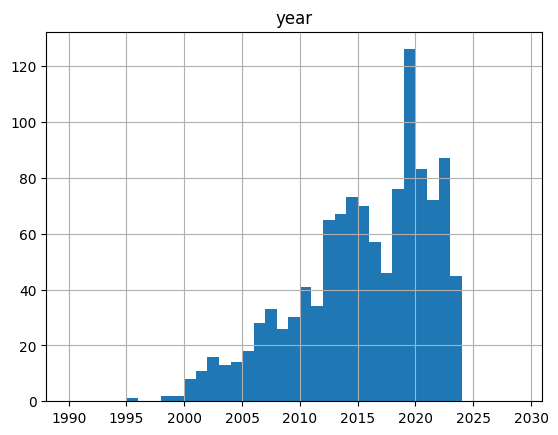

In [18]:
hist = brl_df.hist(column=['year'],bins=range(1990,2030))